### Problem Statement:

**Context**:
The Gurugram-based FlipItNews aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

**Objective**:
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

### Attribute Information:

* Article
* Category

The feature names are themselves pretty self-explanatory.

In [2]:
# To ignore all warnings
import warnings


import pandas as pd
import numpy as np
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

import re

# To use Natural Language Processing
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

!pip install category_encoders
import category_encoders as ce


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df = pd.read_csv('flipitnews-data.csv')
df.sample(10)

,Category,Article
1411,Technology,net fingerprints combat attacks eighty large n...
1867,Sports,federer breezes into semi-finals roger federer...
519,Politics,no to royal succession shake-up a labour peer ...
887,Politics,minister defends hunting ban law the law banni...
462,Technology,musical future for phones analyst bill thompso...
808,Technology,microsoft sets sights on spyware windows users...
1577,Politics,mcconnell details scots wave toll at least thr...
117,Politics,chancellor rallies labour voters gordon brown ...
794,Technology,millions buy mp3 players in us one in 10 adult...
1975,Technology,lifestyle governs mobile choice faster bett...


In [4]:
# Basic EDA

print('no of rows: ', df.shape[0])

no of rows:  471


[Text(0, 0, '70')]

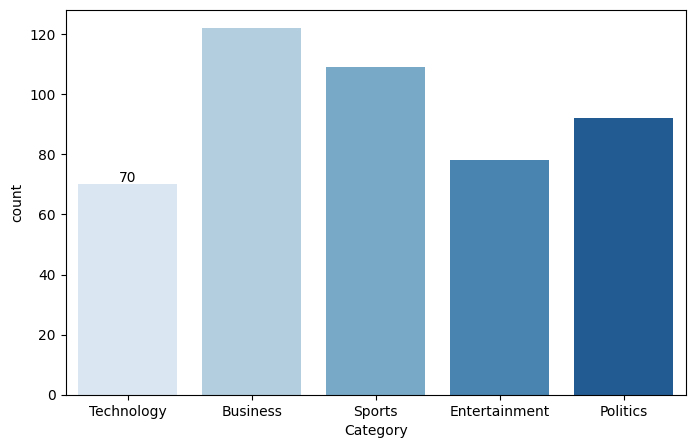

In [6]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='Category', data=df, palette='Blues')
ax.bar_label(ax.containers[0])

In [7]:
# Text Processing

In [8]:
df['Article'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [18]:
stop_words = list(stopwords.words("english"))

def text_process(sent):
  # Removing non-letters
  sent = re.sub('[^a-zA-Z]', ' ', sent)

  # Word tokenizing the text
  words = nltk.word_tokenize(sent)

  # Removing stopwords
  filtered_sent = [w for w in words if not w in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  new_txt = [lemmatizer.lemmatize(word) for word in filtered_sent]
  new_txt = " ".join(new_txt)

  return new_txt

df['Article'] = df['Article'].apply(text_process)

In [19]:
#For target variable

encode = ce.OrdinalEncoder(cols=['Category'])

df = encode.fit_transform(df)

In [14]:
df.sample(10)

,Category,Article
45,4,"[franz, man, seek, government, help, franz, fe..."
145,2,"[industrial, output, fall, japan, japanese, in..."
295,2,"[bush, outline, toughest, budget, president, b..."
386,3,"[wright, phillips, start, right, england, coac..."
368,2,"[emi, share, hit, profit, warning, share, musi..."
141,2,"[u, seek, new, bn, smoker, ruling, u, justice,..."
350,4,"[sky, take, oscar, night, mantle, sky, signed,..."
87,2,"[chinese, dam, firm, defies, beijing, china, t..."
393,2,"[market, signal, brazilian, recovery, brazilia..."
339,5,"[russian, ex, spy, hunger, strike, ex, russian..."


### TF-IDF

In [20]:
tf_idf = TfidfVectorizer()

X = tf_idf.fit_transform(df.Article).toarray()

y = np.array(df['Category'].values)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle=True, stratify=y)

In [22]:
print('no of rows in train: ', X_train.shape[0])
print('no of rows in val: ', X_val.shape[0])

no of rows in train:  1668
no of rows in val:  557


## Simple Approach

### Naive Bayes

In [23]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [24]:
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train accuracy: ", nb_train)
print("Test Accuracy: ", nb_test)

Train accuracy:  0.988009592326139
Test Accuracy:  0.9640933572710951


In [25]:
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

In [27]:
roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')

0.9989661443976233

In [28]:
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')


print("Precision: ", precision)
print("Recall: ", recall)
print("f1-score: ", f1)

Precision:  0.9650557892050317
Recall:  0.9640933572710951
f1-score:  0.9640035752287724


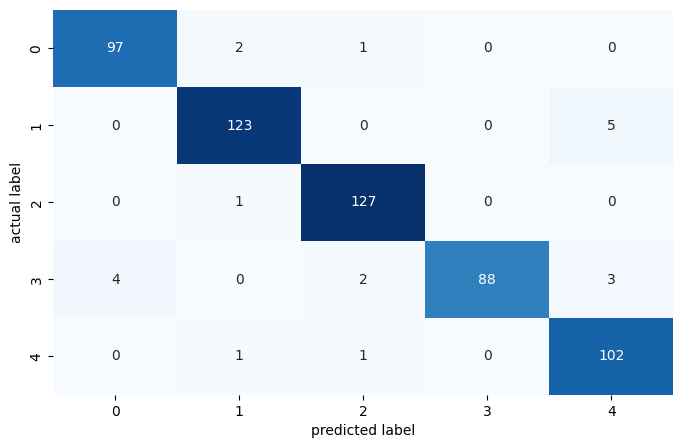

In [30]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')

plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()

In [31]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       100
           2       0.97      0.96      0.96       128
           3       0.97      0.99      0.98       128
           4       1.00      0.91      0.95        97
           5       0.93      0.98      0.95       104

    accuracy                           0.96       557
   macro avg       0.97      0.96      0.96       557
weighted avg       0.97      0.96      0.96       557



# Functionalized Code

In [34]:
def model_train(obj):
  obj.fit(X_train, y_train) # Training the model
  y_pred = obj.predict(X_val) # Making predictions
  y_pred_proba = obj.predict_proba(X_val)
  return y_pred, y_pred_proba


def model_eval(obj, y_pred, y_pred_proba):
    print("-------------------------")

    # Calculating the train & test accuracy
    train_acc = accuracy_score(y_train, obj.predict(X_train))
    test_acc = accuracy_score(y_val, obj.predict(X_val))

    print("Train Accuracy: {:.3f}".format(train_acc))
    print("Test Accuracy: {:.3f}\n".format(test_acc))

    # Computing the ROC AUC score
    print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

    # Computing the precision, recall & f1 score
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))

    print("-------------------------")

## Decision Tree

In [35]:
dt = DecisionTreeClassifier()

y_pred_dt, y_pred_proba_dt = model_train(dt)

model_eval(dt, y_pred_dt, y_pred_proba_dt)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.867

ROC AUC Score: 0.915

Precision: 0.867
Recall: 0.867
F1 Score: 0.867
-------------------------


### Random Forest

In [36]:
rf = RandomForestClassifier()

y_pred_rf, y_pred_proba_rf = model_train(rf)

model_eval(rf, y_pred_rf, y_pred_proba_rf)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.955

ROC AUC Score: 0.998

Precision: 0.957
Recall: 0.955
F1 Score: 0.955
-------------------------


### Bow

In [37]:
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(df.Article).toarray()

y = np.array(df['Category'].values)

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle=True, stratify=y)

In [39]:
print('no of rows in train: ', X_train.shape[0])
print('no of rows in val: ', X_val.shape[0])

no of rows in train:  1668
no of rows in val:  557


### Simple Approach

In [40]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [41]:
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train accuracy: ", nb_train)
print("Test Accuracy: ", nb_test)

Train accuracy:  0.987410071942446
Test Accuracy:  0.9946140035906643


In [42]:
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

In [43]:
roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')

0.9992601638471831

In [44]:
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')


print("Precision: ", precision)
print("Recall: ", recall)
print("f1-score: ", f1)

Precision:  0.9946702722989703
Recall:  0.9946140035906643
f1-score:  0.9946168818280442


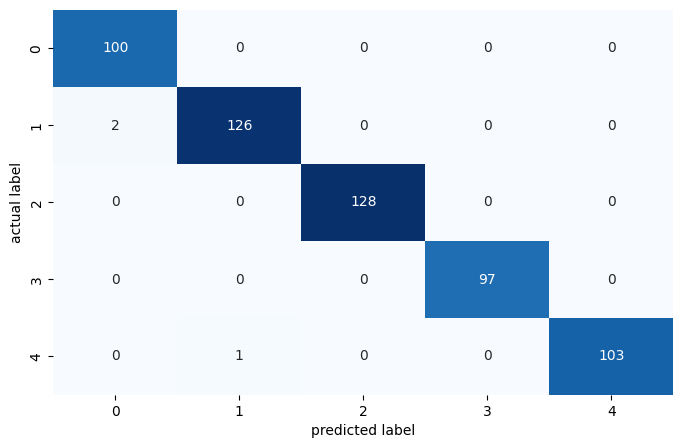

In [45]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')

plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()

In [46]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       100
           2       0.99      0.98      0.99       128
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00        97
           5       1.00      0.99      1.00       104

    accuracy                           0.99       557
   macro avg       0.99      0.99      0.99       557
weighted avg       0.99      0.99      0.99       557



# Functionalized Code

In [47]:
def model_train(obj):
  obj.fit(X_train, y_train) # Training the model
  y_pred = obj.predict(X_val) # Making predictions
  y_pred_proba = obj.predict_proba(X_val)
  return y_pred, y_pred_proba


def model_eval(obj, y_pred, y_pred_proba):
    print("-------------------------")

    # Calculating the train & test accuracy
    train_acc = accuracy_score(y_train, obj.predict(X_train))
    test_acc = accuracy_score(y_val, obj.predict(X_val))

    print("Train Accuracy: {:.3f}".format(train_acc))
    print("Test Accuracy: {:.3f}\n".format(test_acc))

    # Computing the ROC AUC score
    print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

    # Computing the precision, recall & f1 score
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))

    print("-------------------------")

## Decision Tree

In [48]:
dt = DecisionTreeClassifier()

y_pred_dt, y_pred_proba_dt = model_train(dt)

model_eval(dt, y_pred_dt, y_pred_proba_dt)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.844

ROC AUC Score: 0.898

Precision: 0.845
Recall: 0.844
F1 Score: 0.842
-------------------------


In [49]:
# Random Forest

rf = RandomForestClassifier()

y_pred_rf, y_pred_proba_rf = model_train(rf)

model_eval(rf, y_pred_rf, y_pred_proba_rf)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.966

ROC AUC Score: 0.999

Precision: 0.967
Recall: 0.966
F1 Score: 0.966
-------------------------


# LSTM

In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, GRU, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



df = pd.read_csv('flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [51]:
max_features = 5000
maxlen = 100
embedding_size = 100
batch_size = 500
epochs = 10

In [53]:
def preprocess_text(df, text_column):
    df[text_column] = df[text_column].apply(lambda x: x.lower())
    
    return df

df = preprocess_text(df, 'Article')

In [55]:
#Tokenization

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(df['Article'])

sequences = tokenizer.texts_to_sequences(df['Article'])
data = pad_sequences(sequences, maxlen = maxlen)

In [59]:
le = LabelEncoder()

labels = le.fit_transform(df['Category'])
labels = tf.keras.utils.to_categorical(labels)

In [60]:
labels

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)


In [67]:
def load_glove_embeddings(embedding_path, embedding_dim, tokenizer, max_features):

  embeddings_index = {}

  with open(embedding_path, 'r', encoding='utf8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs


  limited_word_index = {word:index for word, index, in tokenizer.word_index.items() if index < max_features}

  embedding_matrix =  np.zeros((min(max_features + 1, len(limited_word_index) + 1), embedding_dim))


  for word, i in limited_word_index.items():
    if i > max_features:
      continue

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

  return embedding_matrix

In [68]:
embedding_matrix = load_glove_embeddings('glove.6B.100d.txt', embedding_size, tokenizer, max_features)

In [75]:
model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix],
              input_length=maxlen, trainable=False),
    LSTM(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')

])

In [76]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=(X_test, y_test),
          verbose=2, callbacks=[early_stopping])

Epoch 1/10
4/4 - 15s - loss: 1.5946 - accuracy: 0.2708 - val_loss: 1.5343 - val_accuracy: 0.3663 - 15s/epoch - 4s/step
Epoch 2/10
4/4 - 6s - loss: 1.4703 - accuracy: 0.4202 - val_loss: 1.4084 - val_accuracy: 0.4966 - 6s/epoch - 2s/step
Epoch 3/10
4/4 - 4s - loss: 1.3195 - accuracy: 0.6073 - val_loss: 1.2156 - val_accuracy: 0.6157 - 4s/epoch - 1s/step
Epoch 4/10
4/4 - 3s - loss: 1.0572 - accuracy: 0.7090 - val_loss: 0.9578 - val_accuracy: 0.6067 - 3s/epoch - 774ms/step
Epoch 5/10
4/4 - 6s - loss: 0.8276 - accuracy: 0.7000 - val_loss: 0.8406 - val_accuracy: 0.6831 - 6s/epoch - 1s/step
Epoch 6/10
4/4 - 4s - loss: 0.7435 - accuracy: 0.7337 - val_loss: 0.7324 - val_accuracy: 0.7461 - 4s/epoch - 889ms/step
Epoch 7/10
4/4 - 4s - loss: 0.6436 - accuracy: 0.7966 - val_loss: 0.7666 - val_accuracy: 0.7348 - 4s/epoch - 960ms/step
Epoch 8/10
4/4 - 4s - loss: 0.6208 - accuracy: 0.8034 - val_loss: 0.7629 - val_accuracy: 0.7393 - 4s/epoch - 1s/step
Epoch 9/10
4/4 - 5s - loss: 0.6223 - accuracy: 0.7944

In [72]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))

14/14 [==============================] - 1s 27ms/step
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       101
           1       0.88      0.81      0.85        81
           2       0.66      0.93      0.77        83
           3       0.95      0.96      0.95        98
           4       0.93      0.78      0.85        82

    accuracy                           0.84       445
   macro avg       0.86      0.84      0.84       445
weighted avg       0.86      0.84      0.85       445



In [73]:
## Model building

model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    GRU(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model training
model.fit(X_train, y_train,
batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2,
callbacks=[early_stopping])


from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))

Epoch 1/10
4/4 - 10s - loss: 1.6056 - accuracy: 0.2360 - val_loss: 1.5383 - val_accuracy: 0.3528 - 10s/epoch - 2s/step
Epoch 2/10
4/4 - 4s - loss: 1.4945 - accuracy: 0.4090 - val_loss: 1.4505 - val_accuracy: 0.4000 - 4s/epoch - 1s/step
Epoch 3/10
4/4 - 3s - loss: 1.4002 - accuracy: 0.4944 - val_loss: 1.3708 - val_accuracy: 0.4831 - 3s/epoch - 748ms/step
Epoch 4/10
4/4 - 2s - loss: 1.3134 - accuracy: 0.5573 - val_loss: 1.2954 - val_accuracy: 0.5371 - 2s/epoch - 583ms/step
Epoch 5/10
4/4 - 2s - loss: 1.2264 - accuracy: 0.5876 - val_loss: 1.2135 - val_accuracy: 0.5618 - 2s/epoch - 530ms/step
Epoch 6/10
4/4 - 2s - loss: 1.1278 - accuracy: 0.6146 - val_loss: 1.1033 - val_accuracy: 0.6090 - 2s/epoch - 550ms/step
Epoch 7/10
4/4 - 4s - loss: 0.9971 - accuracy: 0.6545 - val_loss: 0.9696 - val_accuracy: 0.6225 - 4s/epoch - 877ms/step
Epoch 8/10
4/4 - 3s - loss: 0.8471 - accuracy: 0.6876 - val_loss: 0.8461 - val_accuracy: 0.6854 - 3s/epoch - 717ms/step
Epoch 9/10
4/4 - 2s - loss: 0.7256 - accurac

In [74]:
### SimpleRNN


# Model building
model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    SimpleRNN(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model training
model.fit(X_train, y_train,
batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2,
callbacks=[early_stopping])

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))

Epoch 1/10
4/4 - 4s - loss: 1.7217 - accuracy: 0.2444 - val_loss: 1.6275 - val_accuracy: 0.2697 - 4s/epoch - 994ms/step
Epoch 2/10
4/4 - 1s - loss: 1.5697 - accuracy: 0.2983 - val_loss: 1.5291 - val_accuracy: 0.3169 - 880ms/epoch - 220ms/step
Epoch 3/10
4/4 - 1s - loss: 1.4367 - accuracy: 0.4073 - val_loss: 1.4186 - val_accuracy: 0.3888 - 903ms/epoch - 226ms/step
Epoch 4/10
4/4 - 1s - loss: 1.3011 - accuracy: 0.4736 - val_loss: 1.2824 - val_accuracy: 0.4742 - 780ms/epoch - 195ms/step
Epoch 5/10
4/4 - 1s - loss: 1.1403 - accuracy: 0.5326 - val_loss: 1.1778 - val_accuracy: 0.5034 - 848ms/epoch - 212ms/step
Epoch 6/10
4/4 - 1s - loss: 1.0599 - accuracy: 0.5590 - val_loss: 1.0941 - val_accuracy: 0.5685 - 894ms/epoch - 223ms/step
Epoch 7/10
4/4 - 1s - loss: 0.9818 - accuracy: 0.6180 - val_loss: 1.0930 - val_accuracy: 0.5708 - 1s/epoch - 264ms/step
Epoch 8/10
4/4 - 2s - loss: 0.9465 - accuracy: 0.6449 - val_loss: 1.0081 - val_accuracy: 0.6112 - 2s/epoch - 408ms/step
Epoch 9/10
4/4 - 2s - los

## Inference

In [81]:
def predict_category(text, tokenizer, model, label_encoder, max_len):

  text = text.lower()

  seq = tokenizer.texts_to_sequences([text])

  padded_seq = pad_sequences(seq, maxlen = max_len)

  pred= model.predict(padded_seq)

  pred_label_index = np.argmax(pred, axis=1)

  pred_label = label_encoder.inverse_transform(pred_label_index)

  return pred_label[0]


input_text = 'I need to create better algorithm for predicting the stock market'

predicted_category = predict_category(input_text, tokenizer, model, le, maxlen)

print("predicted category: ", predicted_category)

1/1 [==============================] - 0s 71ms/step
predicted category:  Business


In [82]:
input_text = 'I love playing football, I make several goals'

predicted_category = predict_category(input_text, tokenizer, model, le, maxlen)

print("predicted category: ", predicted_category)

1/1 [==============================] - 0s 63ms/step
predicted category:  Sports
